In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
import tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
tensorflow.config.run_functions_eagerly(True)

In [2]:
train = pd.read_csv("./data/train.csv")
validation = pd.read_csv("./data/test.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/train.csv'

In [ ]:
X = train.drop("label", axis=1)
y = train["label"]

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=1, train_size=0.8)

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential([
    layers.Dense(units=256, activation="relu", input_shape=[len(X_train.columns)]),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights=True
)

In [ ]:
print("Training X", X_train.shape)
print("Training Y", Y_train.shape)
print("Validation X", X_val.shape)
print("Validation Y", Y_val.shape)

Training X (33600, 784)
Training Y (33600, 10)
Validation X (8400, 784)
Validation Y (8400, 10)


In [ ]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val), 
                    batch_size=32, 
                    epochs=500, 
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/500
  2/263 [..............................] - ETA: 14s - loss: 3.0050 - acc: 0.1172

c:\dev\computer_vision\env\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


263/263 [==============================] - ETA: 0s - loss: 0.5022 - acc: 0.8422

c:\dev\computer_vision\env\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


263/263 [==============================] - 17s 63ms/step - loss: 0.5022 - acc: 0.8422 - val_loss: 0.1625 - val_acc: 0.9508
Epoch 2/500
263/263 [==============================] - 17s 63ms/step - loss: 0.2068 - acc: 0.9375 - val_loss: 0.1278 - val_acc: 0.9627
Epoch 3/500
263/263 [==============================] - 17s 63ms/step - loss: 0.1599 - acc: 0.9506 - val_loss: 0.1081 - val_acc: 0.9673
Epoch 4/500
263/263 [==============================] - 17s 63ms/step - loss: 0.1328 - acc: 0.9594 - val_loss: 0.1031 - val_acc: 0.9695
Epoch 5/500
263/263 [==============================] - 17s 63ms/step - loss: 0.1092 - acc: 0.9665 - val_loss: 0.0873 - val_acc: 0.9737
Epoch 6/500
263/263 [==============================] - 17s 63ms/step - loss: 0.1023 - acc: 0.9670 - val_loss: 0.0931 - val_acc: 0.9748
Epoch 7/500
263/263 [==============================] - 17s 64ms/step - loss: 0.0961 - acc: 0.9696 - val_loss: 0.0944 - val_acc: 0.9732
Epoch 8/500
263/263 [==============================] - 17s 64ms/ste

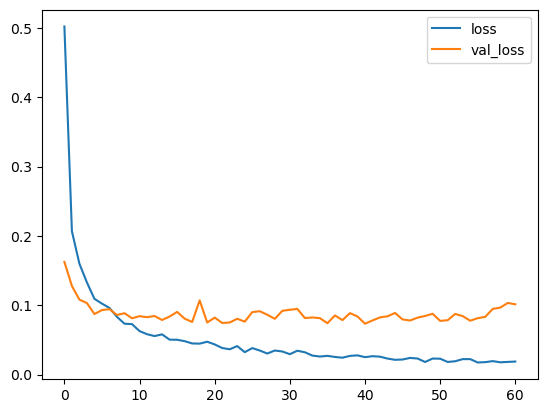

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 0.07336311042308807
